<a href="https://colab.research.google.com/github/Marcozambeli/General/blob/main/Trabalho_2_EST_SE_Marco_Antonio_Zambeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENE057A - Estabilidade em Sistemas El√©tricos de Pot√™ncia M√≥dulo 1 - Geradores S√≠ncronos
###Trabalho 2 - Marco Antonio de O. Zambeli 201369026c

Instru√ß√µes:

‚Ä¢ Data de submiss√£o: 18/02/2021

‚Ä¢ Resolu√ß√£o do trabalho deve ser individual submetida via Google Classroom.

‚Ä¢ A resolu√ß√£o deve ser realizada em um notebook do Google Colab,

‚Ä¢ Os tanto o racioc√≠nio como os resultados dos c√°lculos devem ser devidamente explicados e comentados.





###1. Seja o gerador de 144,6 [MVA], 18 [kV] e 60 [Hz] cujos par√¢metros eleÃÅtricos e mec√¢nicos est√£o relacionados abaixo. Valores por unidade s√£o baseados na pot√™ncia e tens√£o nominais da maÃÅquina.
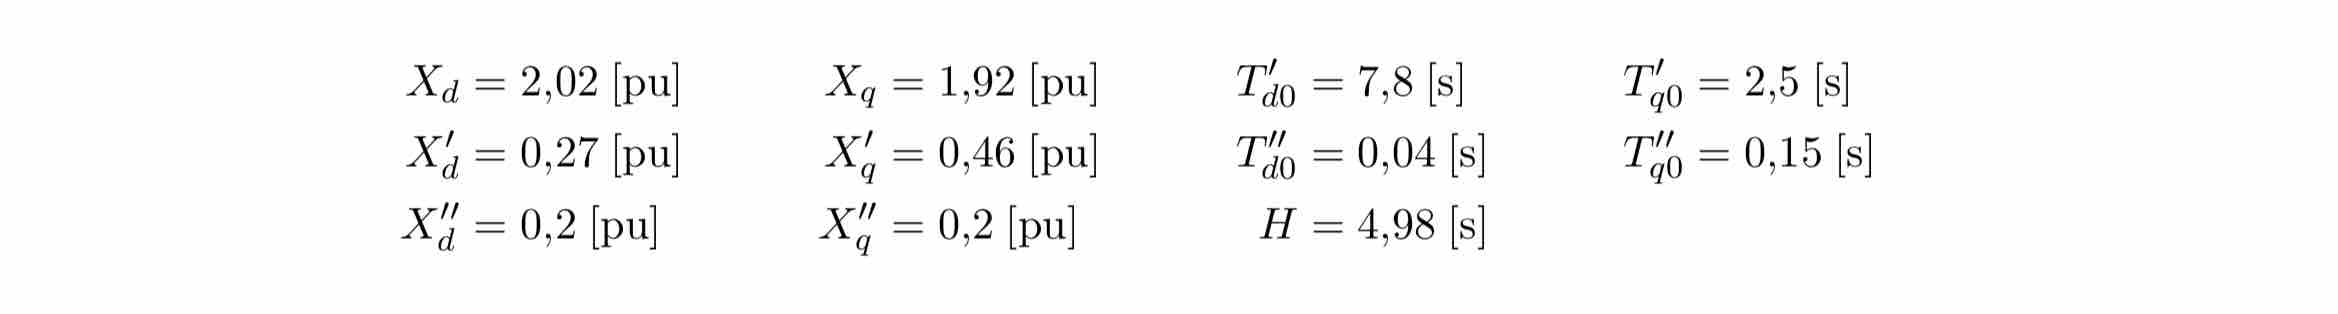
###Assumindo que a m√°quina opere com pot√™ncia aparente nominal e fator de pot√™ncia 0,9 (indutivo) conectada a uma barra infinita com tens√£o nominal, calcule:


In [15]:
!pip install control

In [16]:
# 1¬∫ bloco de c√≥digo para importar bibliotecas e declarar as vari√°veis do caso em an√°lise:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.optimize import root
import scipy.integrate as integrate
import math
import cmath



# Dados da m√°quina:
Sb = 144.6    # [MVA]
Vb = 18       # [kV]
f  = 60        # [Hz]
fp = 0.9

# Reat√¢ncias dos eixos direto e em quadratura
Xd = 2.02
X1d = 0.27
X2d = 0.2
Xq = 1.92
X1q = 0.46
X2q = 0.2

# Constantes de tempo de circuito aberto, em segundos
T1d0 = 7.8
T2d0 = 0.04
T1q0 = 2.5
T2q0 = 0.15

# Constante de in√©rcia do eixo [s]
H = 4.98   

# Constante de amortecimento [pu]
D = 0

# Resist√™ncia de armadura
Ra = 0

# Velocidade de rota√ß√£o
wb = 2*np.pi*f 


###(a) Corrente de armadura, tens√£o interna e √¢ngulo de carga da m√°quina em regime permanente:

####Embasamento Te√≥rico:
Primeiramente, analisa-se o circuito equivalente da m√°quina em regime permanente:

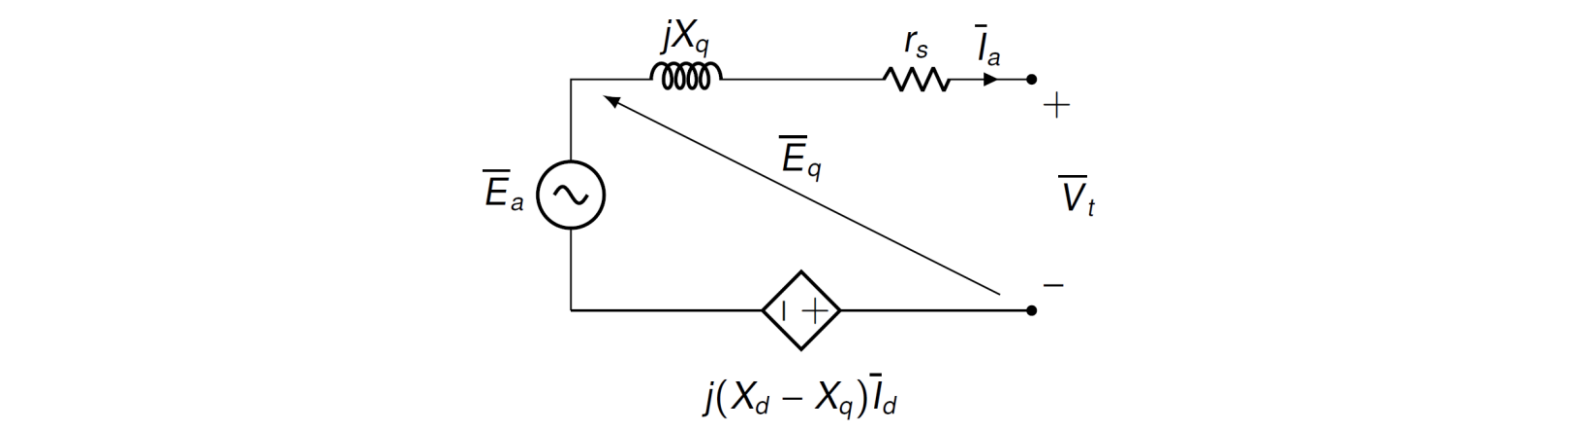

*Imagem retirada das notas de aula do prof Marcelo Tomim*

Inicialmente, calcula-se a rela√ß√£o entre as pot√™ncias da m√°quina. De posse da potencia aparente e do fator de pot√™ncia, fica viabilizado o uso do tri√¢ngulo de pot√™ncias para o c√°lculo daquelas ativa e reativa.

>Assim, pode-se lan√ßar m√£o das seguites rela√ß√µes matem√°ticas:

$S = P + jQ$ ; $fp = 0,9 = cos(Œ∏)$

>Das rela√ß√µes trigonom√©tricas, tem-se tamb√©m:

$P=S_b \cdot cos(\theta) $ ; $Q=S_b \cdot sin(\theta)$

>Em valores por unidade:

$P_{pu}= \frac{P}{S_b}$ ; $Q_{pu}= \frac{Q}{S_b}$

>A corrente de armadura pode ser calculada pela rela√ß√£o:

$I_a = (\frac{S}{V_t})^* = (\frac{P_{pu}+jQ_{pu}}{V_t})^* = (\frac{P_{pu}-jQ_{pu}}{V_t})$
, onde Vterminal = 1pu.


> O √¢ngulo de carga da m√°quina em regime permanente √© aquele referente √† tens√¢o $E_q$, tal √¢ngulo (definido como "**Œ¥**") determina o posicionamento entre o eixo de quadatura e a refer√™ncia, gra√ßas ao fato desse eixo estar em fase com a tens√£o $E_q$.

> O √¢ngulo $Œ¥$ pode ser encontrado pela resolu√ß√£o da malha do circuito equivalente visto anteriormente, assim define-se a equa√ß√£o abaixo para a tensao $E_q$, em m√≥dulo e fase:

$√ä_q=V_t+jX_q*√é_a-r_a*√é_a$ 

>A tens√£o interna $E_a$ pode tamb√©m ser encontrada a partir da equa√ß√£o de malha do circuito equivalente para o regime permanente:

$√ä_a=√ä_q+j(X_d-X_q)*√é_d$




In [17]:
# In√≠cio dos c√°lculos
#Primeiramente, encotra-se a corrente Ia
vt = 1                   #Tens√£o terminal(nominal)
theta = math.acos(fp) 
P = Sb*math.cos(theta)   #Pot ativa
Ppu = P/Sb               #Pot ativa em pu
Q = Sb*math.sin(theta)   #Pot reativa 
Qpu = Q/Sb               #Pot reativa em pu
S = complex(Ppu,Qpu)     #Pot Aparente em Pu 

#C√°lculo da Corrente Ia:
Ia = (complex.conjugate(S)/vt)
print("Ia √© igual a:", Ia)

Ia √© igual a: (0.8999999999999999-0.4358898943540673j)


**Com isso, a corrente de armadura √© aproximadamente: $I_a=0,9-j0.436$ [pu]**

In [18]:
# Ia em representa√ß√£o polar:
cmath.polar(complex(Ia))

(0.9999999999999999, -0.4510268117962624)

In [19]:
# œÜ em graus:
phirad = -0.4510268117962624
phi= (phirad*180)/np.pi
phi

-25.84193276316713

In [20]:
#Nesse bloco de c√≥digo, encontra-se o √¢ngulo Œ¥ atrav√©s da express√£o de Eq

Eq = vt + (complex(0,Xq)*Ia) - Ra*Ia 
Eq         #tens√£o Eq com m√≥dulo e fase
cmath.polar(complex(Eq))


(2.521947103790961, 0.7548574829844482)

Assim, $E_q=2,522pu$ e $\delta=0,755 rad$


In [21]:
#Transforma-se o √¢ngulo de carga para graus, fazendo:
deltarad = 0.7548574829844482
delta = (deltarad*180)/np.pi
delta

43.25014790887723

>**Logo, o √¢ngulo de carga da m√°quina √© $\delta=43,25¬∫$**

In [22]:
#O c√°lculo da Tens√£o interna vem do equacionamento do circuito como sugerido na teoria acima
# Corrente referenciada a dq
Id=abs(Ia)*math.sin((-deltarad)+(phirad))
Ea = Eq+complex(0,Xq-Xd)*Id  

cmath.polar(complex(Ea))

(2.5868489858113164, 0.7811631671829042)

>**Portanto, Ea tem um m√≥dulo de 2.59 pu e uma fase de 0.78 radianos.**

###(b) Corrente de armadura nos eixos direto e em quadratura em regime permanente.

####Embasamento Te√≥rico:
>A corrente armadura levada ao referencial $dq$ pela rela√ß√£o: 

$I_a^{qd}=I_a \times e^{-j\theta}$, tal que  $\theta$ √© genericamente o √¢ngulo de $Eq$

>A partir da an√°lise do diagrama fasorial da carga indutiva, nota-se a decomposi√ß√£o da corrente $Ia$ em duas componente:

*   $I_d$, parte real de $I_a$ em sua forma retangular, com fase $-90¬∫$;
*   $I_q$, parte imagin√°ria de $I_a$ tamb√©m no fomrmato retangular e fase $0¬∫$.

O diagrama segue:

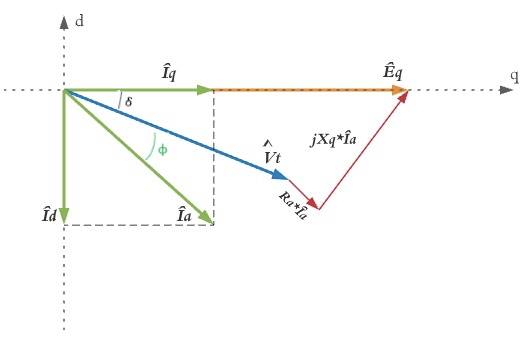


In [23]:
 #desse modo tem-se:
# Corrente referenciada a dq
#Id=abs(Ia)*math.sin((-deltarad)+(phirad)), usada no item anterior

# Ia no eixo em quadratura:
Iq = abs(Ia)*math.cos((-deltarad)+phirad)

# Ia nos eixos dq
Ieixos= complex(Iq,Id)
Ieixos


(0.3568671201101444-0.9341551576608094j)

>**Assim, a corrente de armadura referenciada nos eiaxos dq √© $Ieixos=0,36-j0,93$ [pu]**

###(c) Tens√£o terminal nos eixos direto e em quadratura em regime permanente.
#### Embasamento te√≥rico

> Inicia-se decompondo o $V_t$ com o auxilio do angulo de carga ($\delta$), dessa forma obt√™m-se $V_q$ e $V_d$. Para $\delta=43,35¬∫$, tem-se em $[pu]$:



*   $V_q=V_t\cdot cos(\delta)$
*   $V_d=V_t\cdot sin(\delta)$





In [24]:
##C√°lculo das tens√µes terminais em regime permanente:

#Tens√£o terminal no eixo em quadratura:
Vq = vt * math.cos(delta)

##Tens√£o terminal no eixo direto:
Vd = vt * math.sin(delta)

print("Tens√£o terminal no eixo em quadratura √©: %s pu. A tens√£o terminal no eixo direto √©: %s pu" % (Vq, Vd))



Tens√£o terminal no eixo em quadratura √©: 0.7437394185652849 pu. A tens√£o terminal no eixo direto √©: -0.6684696532170866 pu


###(d) Tens√£o transit√≥ria nos eixos direto e em quadratura em regime permanente.
#### Embasamento te√≥rico:

Calcula-se as tens√µes transit√≥rias, utilizando o seguinte equacionamento matem√°tico:



*   $E'_d=-I_q(X_q-X'_q)$
*   $E'_q=E_a+I_d(X_d-X'_d)$




In [25]:
#Tens√£o transit√≥ria no eixo direto em regime permanente:
E1d = -Iq * (Xq-X1q)
print("E'd = ", E1d)

#Tens√£o transit√≥ria no eixo em quadratura em regime permanente:
E1q = abs(Ea) + Id*(Xd-X1d)
print("E'q = ", E1q)

E'd =  -0.5210259953608107
E'q =  0.9520774599049


###(e) Compare as caracter√≠sticas de pot√™ncia el√©trica em fun√ß√£o do √¢ngulo de carga para os regimes permanente e transit√≥rio.

#### Embasamento te√≥rico:
>Primeiramente as pot√™ncias el√©tricas ser√£o expressas como:


*   Em regime transit√≥rio: $Pe_{transitoria}=\frac {Vt.E'_d}{X'_q}cos(\delta) + \frac {Vt.E'_q}{X'_d}sin(\delta) - \frac{V_t^2}{2}(\frac{1}{X'_d}-\frac{1}{X'_q})sin(2\delta)$
*   Em regime permanente: $Pe_{permanente}=\frac{V_t.E_a}{X'_q}sin(\delta)- \frac{V_t^2}{2}(\frac{1}{X_d}-\frac{1}{X_q})sin(2\delta)$


Do gr√°fico abaixo, tira-se algumas conclus√µes:

*  Ocorre um cruzamento entre as pot√™ncias justamente no ponto onde a m√°quina est√° despachada, aproximadamente em $0,95pu$;

*  Como $X'_q > X'_d$, o pico para a pot√™ncia do per√≠odo transit√≥rio ocorre para valores maiores de $90¬∫$, neste caso pr√≥ximo de $120¬∫$.;

*  Pode-se notar a disparidade entre os m√°ximos valores de pot√™ncia transit√≥rias e permanente, enquanto, inicialmente, o pico da primeira quase alcan√ßa os $4.5pu$, a segunda chega a $1pu$;

* Como conclus√£o, a capacidade de frenagem da m√°quina durante o per√≠odo transit√≥rio √© bem superior √† do periodo permanente, tal fato contribui para o correto funcionamento da m√°quina s√≠ncrona na rede el√©trica.


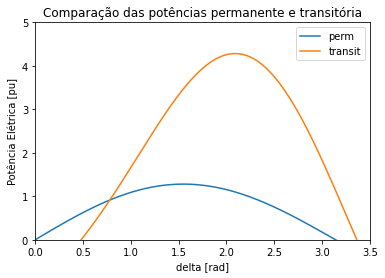

In [26]:
def Pe_transitoria(delt):
  return  ((vt*E1d*np.cos(delt))/X1q) + ((vt*E1q*np.sin(delt))/X1d) - (((vt**2)/2)*((1/X1d)-(1/X1q))*np.sin(2*delt))

def Pe_permanente(delt):
  return  ((vt*abs(Ea)*np.sin(delt))/Xd) -  (((vt**2)/2)*((1/Xd)-(1/Xq))*np.sin(2*delt))



escala = np.linspace(0, 4, 300)


plt.plot(escala, list(map(Pe_permanente,escala)), label = "perm")
plt.plot(escala, list(map(Pe_transitoria, escala)), label = 'transit')

plt.title('Compara√ß√£o das pot√™ncias permanente e transit√≥ria')
plt.ylabel('Pot√™ncia El√©trica [pu]')
plt.xlabel('delta [rad]')
plt.axis([0, 3.5, 0, 5])
plt.legend()
plt.show()


###(f) Determine as equa√ß√µes diferenciais que permitam a an√°lise dessa m√° ÃÅquina no seu per√≠odo transit√≥rio. Inclua as condi√ß√µes iniciais apropriadas para as vari√°veis de estado consideradas.

#### Embasamento te√≥rico
>Analisa-se a m√°quina em regime transit√≥rio com as seguintes equa√ß√µes:

*  $2H\frac {dw}{dt} = P_m - P_e(\delta) - D w$

*  $\frac {d\delta}{dt} = w_b\cdot w$

*  $P1e_{transit} = \frac {Vt \cdot E'd}{X'q} cos(\delta) + \frac {Vt \cdot E'q}{X'd}sen(\delta) - \frac {Vt^2}{2} ( \frac {1}{X'd}- \frac {1}{X'q}) sen(2\delta)$

 > A varia√ß√£o de Œ¥ fica relacionada ao desvio da velocidade da m√°quina e, este depende do equil√≠brio entre as pot√™ncias no eixo.
 
 > A pot√™ncia desenvolvida depende da posi√ß√£o do √¢ngulo Œ¥ do eixo em quadratura. 

>As condi√ß√µes inciais apropriadas s√£o aquelas de equil√≠brio da m√°quina:

* $w(0) = 0$

* $\delta(0) = 0$

* $P_{mec} = Pe(\delta_0)$

> legenda: 
* H - constante de in√©rcia do eixo [s];
* w - desvio de velocidade angular[pu], onde w = wr - 1;
* wr - velocidade angular do eixo [pu];
* Pm - pot√™ncia mec√¢nica desenvolvida pela m√°quina [pu];
* Pe - pot√™ncia el√©trica desenvolvida pelo gerador [pu];
* D - constante de amortecimento [pu]. 


###(g) Estime o tempo cr√≠tico de abertura de um curto-circuito trif√°sico franco nos terminais dessa m√°quina.
#### Embasamento Te√≥rico:

> A determina√ß√£o do tempo cr√≠tico de abertura do curto-circuito franco se basear√° no crit√©rio das √°reas iguais. Tal m√©todo proporciona a determina√ßao do √¢nglulo $\delta_{critico}$ de elimina√ß√£o de falta, a medida que a √°rea de acelera√ßao durante a falta $(A_1)$ e a de desacelera√ß√£o no p√≥s-falta $(A_2)$ sejam iguais. De posse do valor do √¢ngulo cr√≠tico, pode-se estimar o tempo (chamado tamb√©m de cr√≠tico) no qual a prote√ß√£o do sistema precisa atuar sem que o funcionamento do mesmo seja danificado. A rela√ß√£o entre √°reas e √¢ngulos segue como:

*  $A_1(\delta_0,\delta_c)=A_2(\delta_c,\delta_1)$

#### Determina√ß√£o da pot√™ncia acelerante

> A √°rea de acelera√ß√£o $A_1$ apresentada inicialmente est√° relacionada com a falha durante um curto-circuito franco, logo a pot√™ncia el√©trica √© nula. J√° √°rea 2 de desacelera√ß√£o refere-se puramente √† pot√™ncia no p√≥s falta. o equacionamento segue:

* $P_a(\delta)=P_m-Pe_{transitorio}$
* $P_a^{dur}=P_m$
* $P_a^{pos}=P_m-Pe_{transitorio}$ 

> Analisando os pontos de equil√≠brio do sistema em quest√£o, percebe-se a presen√ßa de dois. O primeiro √© identificado como sendo o √¢ngulo de carga inicial ($\delta_{rad}=0,75$), assim o segundo ponto de equil√≠brio faz refer√™ncia ao angulo m√°ximo atingido pelo conjunto gerador-turbina $(\delta_1)$. Tal valor ser√° encontrado no bloco de c√≥digo que se segue.



In [27]:
Pm = Pe_transitoria(deltarad)

def Pa_durante(delta):
  return Pm*np.ones_like(delta)

def Pa_pos(delta):
  return Pm - Pe_transitoria(delta)

sol1 = root(Pa_pos, x0=np.pi)
delta1 = sol1.x[0]
print("O valor encontrado de ùõø1 √©: ",delta1)

O valor encontrado de ùõø1 √©:  3.2015874707536147


#### C√°lculo das √°reas
> De posse dos dois √¢ngulos referentes aos pontos de equil√≠brio do sistema, o c√°lculo das √°reas fica viabilizado a partir da solu√ß√£o das integrais de √°reas em quest√£o. S√£o estas:
*  $A_1(\delta_c)=\int\limits_{\delta_{rad}}^{\delta_c}P_m*d\delta$
*  $A_2(\delta_c)=\int\limits_{\delta_{rad}}^{\delta_c}P_a^{dur}*d\delta$

> Posteriormente tais √°reas s√£o igualadas ($A_1(\delta_c)=A_2(\delta_c)$) de tal forma que essa rela√ß√£o resultar√° em uma dependencia direta de $\delta_c$, chegando em um valor para o √¢ngulo cr√≠tico de abertura em falta.

In [29]:
def A1(delta):
  return integrate.quad(Pa_durante, deltarad, delta)[0]

def A2(delta):
  return integrate.quad(Pa_pos, delta, delta1)[0]

def CAE(delta):
  return A1(delta) + A2(delta)

sol_cae = root(CAE, x0=(deltarad+delta1)/2)
deltacrit = sol_cae.x[0]
print("O valor encontrado de ùõøc √©: ",deltacrit)

O valor encontrado de ùõøc √©:  2.4186527110210583


#### Esbo√ßo do gr√°fico das √°reas iguais

> Definidos os valores dos √¢ngulos ($\delta_1=3.2$ e $\delta_c=2.42$), o gr√°fico que se segue ilustra as √°reas equivalentes de acelera√ß√£o e desacelera√ß√£o no decorrer da an√°lise do sistema ao sofrer interfer√™ncia do curto-circuito franco.

In [36]:
Œ¥v = np.linspace(0, 1.1*np.pi, 100)

fig_cae = go.Figure()

fig_cae.add_trace(go.Scatter(x=Œ¥v*180/np.pi, 
                             y=Pe_transitoria(Œ¥v),
                             mode='lines',
                             name='$P_e^{pos}$'))

fig_cae.add_trace(go.Scatter(x=Œ¥v*180/np.pi, 
                             y=Pa_durante(Œ¥v),
                             mode='lines',
                             name='$P_m$')
)

fig_cae.add_trace(go.Scatter(x=[deltarad*180/np.pi], 
                             y=[Pm],
                             mode='markers',
                             name='$\delta_0$',
                             marker={'color':'black'})
)

fig_cae.add_trace(go.Scatter(x=[delta1*180/np.pi], 
                             y=[Pm],
                             mode='markers',
                             name='$\delta_1$',
                             marker={'color':'magenta'})
)

fig_cae.add_trace(go.Scatter(x=deltacrit*180/np.pi*np.array([1, 1]), 
                             y=np.array([0, Pe_transitoria(deltacrit)]),
                             mode='lines+markers',
                             name='$\delta_{crit}$',
                             line={'color':'green', 
                                   'dash':'dot'})
)

# √Årea A1
deltadurante = np.linspace(deltarad, deltacrit, 100)
pdurante = Pa_durante(deltadurante)

fig_cae.add_trace(go.Scatter(x=deltadurante*180/np.pi, 
                             y=pdurante,
                             mode='none',
                             marker={'color':'black'},
                             fill='tozeroy',
                             fillcolor='rgba(255, 0, 0, 0.3)',
                             name='$A_1(\delta_{crit})$')
)

# √Årea A2
deltapos = np.linspace(deltacrit, delta1, 100)
ppos = Pe_transitoria(deltapos)
ppos = np.hstack(([Pm], ppos))
Œ¥pos = np.hstack(([deltacrit], deltapos))

fig_cae.add_trace(go.Scatter(x=deltapos*180/np.pi, 
                             y=ppos,
                             mode='none',
                             marker={'color':'black'},
                             fill='toself',
                             fillcolor='rgba(0, 0, 255, 0.3)',
                             name='$A_2(\delta_{crit})$')
)


fig_cae.update_layout(
        xaxis = { 'title':r'$\Delta~\text{[¬∞]}$'},
        yaxis = { 'title':r'$P~\text{[pu]}$'},
        title = 'Crit√©rio das √°rease iguais',
         plot_bgcolor="#FFF",  # Sets background color to white
)

fig_cae.show()

*No gr√°fico acima observa-se  a **linha pontilhada na cor verde** indicando o √¢ngulo **Œ¥crit**. **O ponto preto** √© referente ao ponto de equil√≠brio **Œ¥rad** e o **ponto rosa** que √© o ponto de equil√≠brio **Œ¥1**.*

#### C√°lculo do tempo cr√≠tico de abertura de um curto-circuito trif√°sico franco nos terminais dessa m√°quina

> Representa√ß√£o matem√°tica do desvio de velocidade $w$, constanre durante o curto-cicuito:

*  $\frac{dw}{dt}=\frac{P_m}{2H}$

> Tal desvio de velocidade ser√° analisado ao passar do tempo ap√≥s a realiza√ß√£o de integrais dos dois lados da igualdade acima, resultando assim:

* $w(t)=\frac{P_m\cdot t}{2H}$ ,  como $\delta(t)=w_b\cdot w$ :
* $\frac{d\delta}{dt}=\frac{P_m\cdot w_b\cdot t}{2H}$

> Com os dois lados dessa ultima equa√ß√£o integrados, tem-se:

* $\delta_c= \delta(t_c)=\delta_{rad}+\frac{P_m\cdot w_b\cdot t_c^2}{4H}$

> Isolando-se o $t_c$:

* $t_c=\sqrt{\frac{4H(\delta_c-\delta_{rad})}{P_m \cdot w_b}}$

> A solu√ß√£o num√©rica do tempo cr√≠tico segue no bloco de c√≥digo abaixo


In [40]:
tc = np.sqrt(4*H*(deltacrit - deltarad)/(Pm*wb))
print("Tempo Cr√≠tico em ms √© igual a = ",tc)

Tempo Cr√≠tico em ms √© igual a =  0.3259179063442494
